In [1]:
!pip install tifffile
!pip install imagecodecs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 25.2 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import numpy as np
import os
import glob
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tifffile as tiff




In [3]:
# Define the UNet model
def unet_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Print model summary
model = unet_model()
model.summary()








# # UNet model
# def unet_model(input_size=(256, 256, 1)):
#     inputs = Input(input_size)
#     conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
#     conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#     conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
#     conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#     conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
#     conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

#     conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
#     conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

#     conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
#     conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

#     up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=-1)
#     conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
#     conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

#     up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=-1)
#     conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
#     conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

#     up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=-1)
#     conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
#     conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

#     up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=-1)
#     conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
#     conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

#     conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

#     model = Model(inputs=[inputs], outputs=[conv10])
#     return model

# model = unet_model()
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['dropout[0][0]']             
                                                                                              

In [5]:
# Load and preprocess the dataset
def load_images_from_folder(folder):
    images = []
    for filename in glob.glob(os.path.join(folder, '*.tif')):
        img = tiff.imread(filename)
        if img.ndim == 3:  # Convert to grayscale if the image is in RGB
            img = tf.image.rgb_to_grayscale(img)
        img = tf.image.resize(img, [256, 256])
        img = img / 255.0  # Normalize to [0, 1]
        images.append(img.numpy())
    return np.array(images)

data_path = '/content/drive/MyDrive/ConvLSTM full/'

all_images = []
years = os.listdir(data_path)
for year in years:
  if year == '2023':
    year_path = os.path.join(data_path, year)
    images = load_images_from_folder(year_path)
    all_images.extend(images)

all_images = np.array(all_images)
print(f"Loaded {all_images.shape[0]} images.")

# Split the dataset
X_train, X_test = train_test_split(all_images, test_size=0.2, random_state=42)

# Reshape for UNet input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)





# import tifffile as tiff

# # Set the path to your dataset
# dataset_path = "/content/drive/MyDrive/ConvLSTM full"

# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         if filename.endswith(".tif"):
#             img = tiff.imread(os.path.join(folder, filename)) # Use tifffile to read the image
#             if img.ndim == 3:
#                 img = tf.image.rgb_to_grayscale(img)
#             img = tf.image.resize(img, [256, 256])
#             img = tf.cast(img, tf.float32) / 255.0
#             images.append(img.numpy())
#     return np.array(images)

# # Load dataset
# years = sorted(os.listdir(dataset_path))
# all_images = []

# for year in years:
#     year_path = os.path.join(dataset_path, year)
#     images = load_images_from_folder(year_path)
#     all_images.extend(images)

# all_images = np.array(all_images)

# # Add noise to images
# def add_noise(images):
#     noise_factor = 0.1
#     noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
#     noisy_images = np.clip(noisy_images, 0., 1.)
#     return noisy_images

# # Split dataset into train and test
# split_ratio = 0.8
# split_index = int(len(all_images) * split_ratio)
# X_train, X_test = all_images[:split_index], all_images[split_index:]

# # Reshape for UNet input
# X_train = X_train[..., np.newaxis].astype(np.float32)
# X_test = X_test[..., np.newaxis].astype(np.float32)

# # Add noise to the input images
# X_train_noisy = add_noise(X_train)
# X_test_noisy = add_noise(X_test)

# X_train_noisy = np.squeeze(X_train_noisy, axis=-1)
# X_test_noisy = np.squeeze(X_test_noisy, axis=-1)



# # Train the model with data augmentation
# batch_size = 16
# epochs = 50


# datagen = ImageDataGenerator()

Loaded 87 images.


In [6]:
X_train_noisy.shape

NameError: name 'X_train_noisy' is not defined

In [18]:
# Train the model
history = model.fit(X_train, X_train, epochs=20, batch_size=8, validation_split=0.1, verbose=1)






# history = model.fit(
#     datagen.flow(X_train_noisy, X_train, batch_size=batch_size),
#     steps_per_epoch=len(X_train) // batch_size,
#     epochs=epochs,
#     validation_data=(X_test_noisy, X_test),
#     verbose=1
# )

Epoch 1/20
8/8 [==============================] - 4s 529ms/step - loss: 0.0445 - accuracy: 0.9655 - val_loss: 0.0557 - val_accuracy: 0.9551
Epoch 2/20
8/8 [==============================] - 4s 526ms/step - loss: 0.0427 - accuracy: 0.9658 - val_loss: 0.0541 - val_accuracy: 0.9554
Epoch 3/20
8/8 [==============================] - 4s 534ms/step - loss: 0.0406 - accuracy: 0.9663 - val_loss: 0.0511 - val_accuracy: 0.9560
Epoch 4/20
8/8 [==============================] - 4s 530ms/step - loss: 0.0393 - accuracy: 0.9666 - val_loss: 0.0493 - val_accuracy: 0.9567
Epoch 5/20
8/8 [==============================] - 4s 535ms/step - loss: 0.0375 - accuracy: 0.9671 - val_loss: 0.0466 - val_accuracy: 0.9574
Epoch 6/20
8/8 [==============================] - 4s 540ms/step - loss: 0.0358 - accuracy: 0.9676 - val_loss: 0.0445 - val_accuracy: 0.9579
Epoch 7/20
8/8 [==============================] - 4s 543ms/step - loss: 0.0341 - accuracy: 0.9680 - val_loss: 0.0427 - val_accuracy: 0.9583
Epoch 8/20
8/8 [====

In [19]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true.flatten(), y_pred.flatten())
    mae = mean_absolute_error(y_true.flatten(), y_pred.flatten())
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    return mse, mae, rmse, r2

mse, mae, rmse, r2 = calculate_metrics(X_test, predictions)
print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R^2: {r2}")








# # Make predictions
# predictions = model.predict(X_test_noisy)

# # Reshape for evaluation
# X_test_flat = X_test.reshape(-1, 256*256)
# predictions_flat = predictions.reshape(-1, 256*256)

# # Evaluate the model
# def evaluate_model(y_true, y_pred):
#     mse = mean_squared_error(y_true, y_pred)
#     mae = mean_absolute_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_true, y_pred)
#     return mse, mae, rmse, r2

# mse, mae, rmse, r2 = evaluate_model(X_test_flat, predictions_flat)
# print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}")


1/1 [==============================] - 0s 22ms/step
MSE: 0.00044486799743026495, MAE: 0.004357580561190844, RMSE: 0.021091893315315247, R^2: 0.9682508021572447


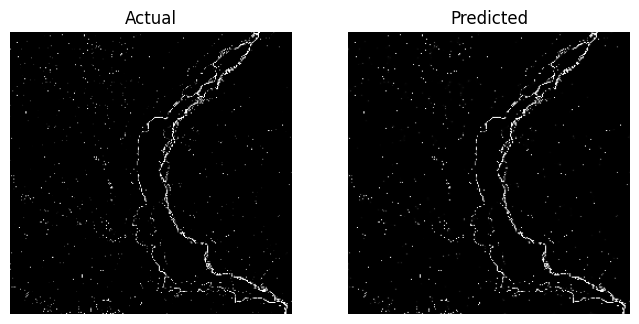

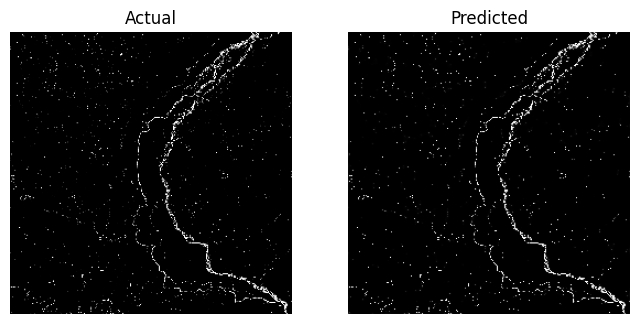

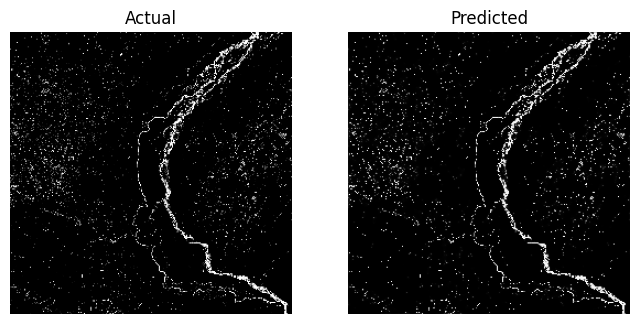

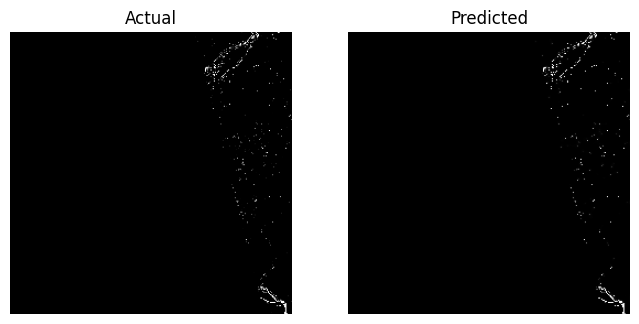

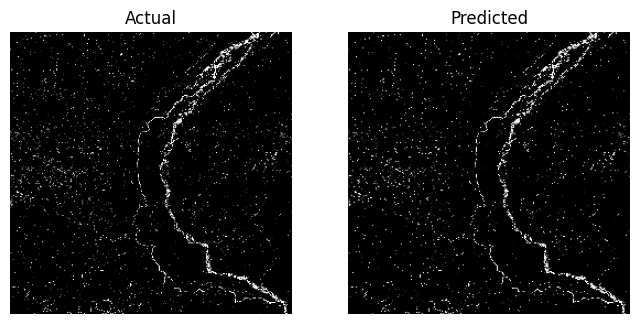

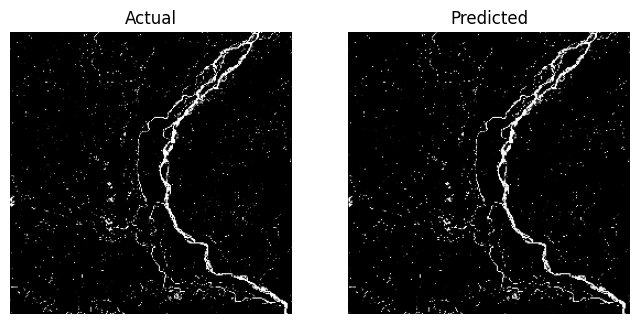

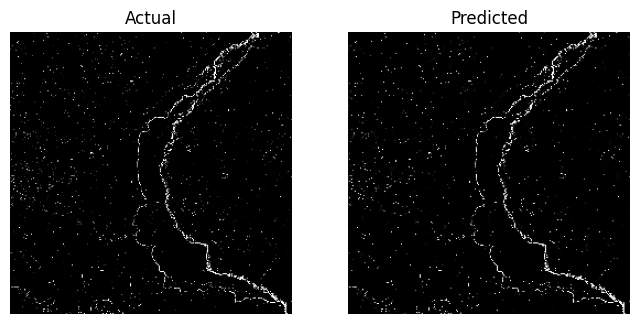

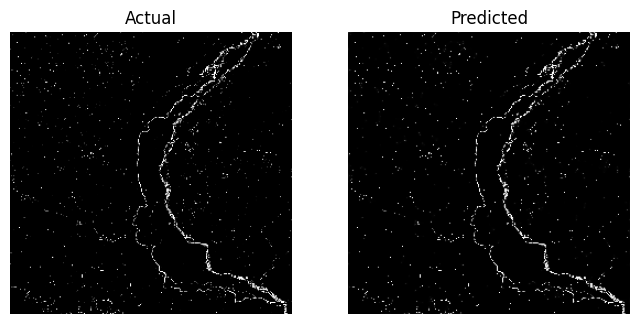

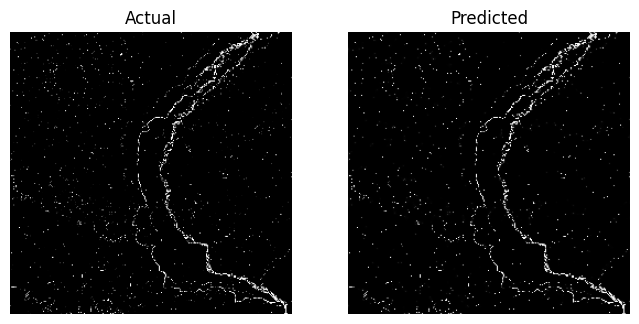

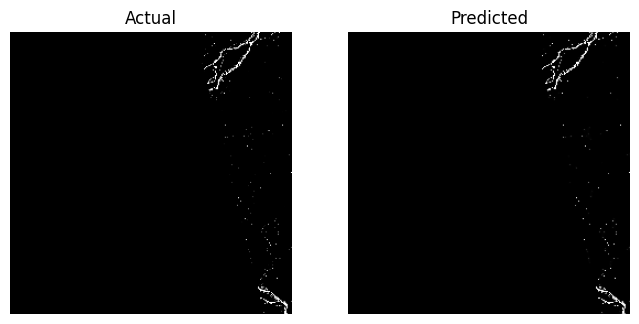

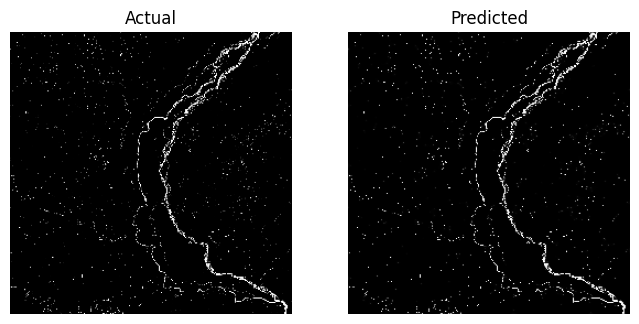

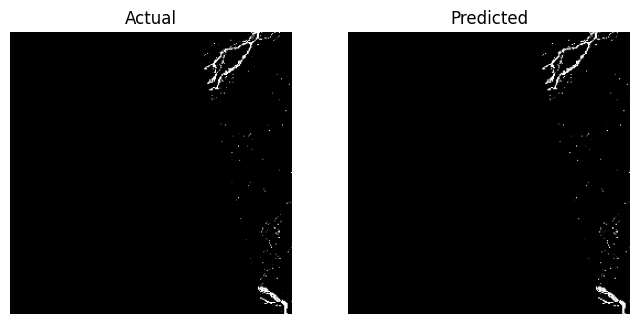

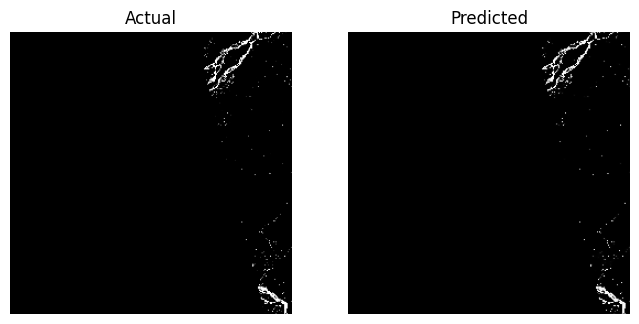

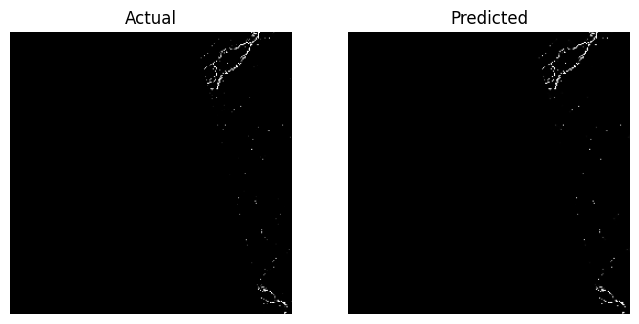

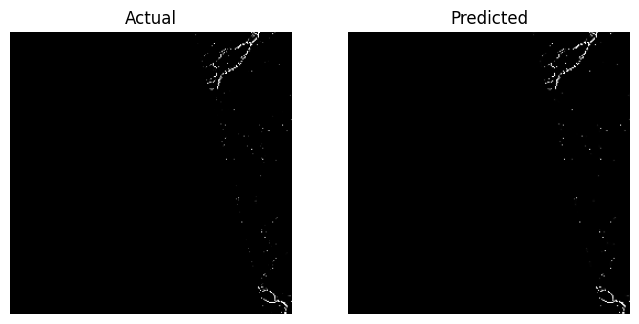

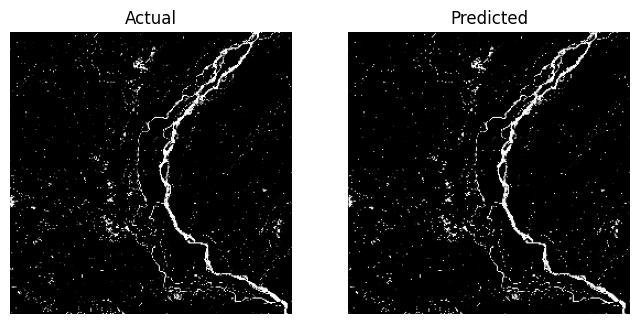

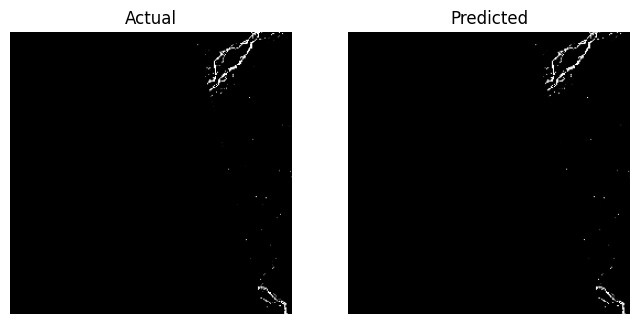

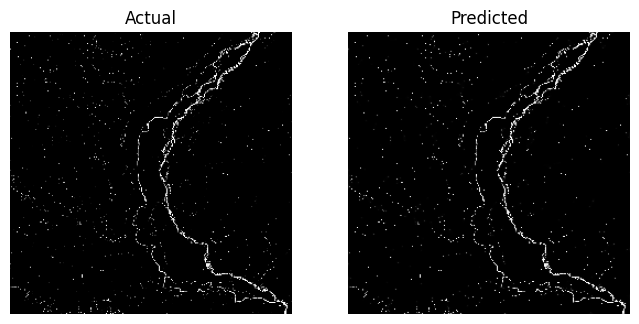

IndexError: index 18 is out of bounds for axis 0 with size 18

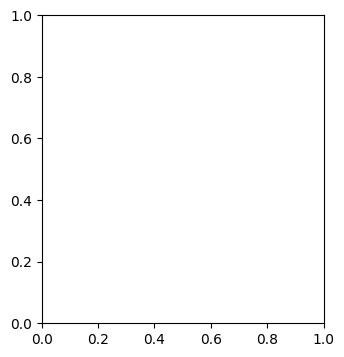

In [20]:
# Visualize some predictions
def plot_sample_predictions(X_test, predictions):
    for i in range(20):
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(X_test[i].squeeze(), cmap='gray')
        plt.title('Actual')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title('Predicted')
        plt.axis('off')

        plt.show()
        plt.close()

plot_sample_predictions(X_test, predictions)



# # Plot sample predictions
# def plot_sample_predictions(X_test, predictions, n=15):
#     for i in range(n):
#         plt.figure(figsize=(10, 5))

#         plt.subplot(1, 2, 1)
#         plt.imshow(X_test[i].squeeze(), cmap='gray')
#         plt.title('Actual')
#         plt.axis('off')

#         plt.subplot(1, 2, 2)
#         plt.imshow(predictions[i].squeeze(), cmap='gray')
#         plt.title('Predicted')
#         plt.axis('off')

#         plt.show()

# plot_sample_predictions(X_test, predictions)